# Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.



In [1]:
##
##

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
##
##

from google.colab import files
uploaded = files.upload()

Saving Contraceptive_method_dataset.xlsx to Contraceptive_method_dataset.xlsx


In [3]:
##
##

contra1 = pd.read_excel("Contraceptive_method_dataset.xlsx", sheet_name= 'Sheet1')
contra1.head(10)

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No
5,19.0,Tertiary,Tertiary,0.0,Scientology,No,3,High,Exposed,No
6,38.0,Primary,Secondary,6.0,Scientology,No,3,Low,Exposed,No
7,21.0,Secondary,Secondary,1.0,Scientology,Yes,3,Low,Exposed,No
8,27.0,Primary,Secondary,3.0,Scientology,No,3,Very High,Exposed,No
9,45.0,Uneducated,Uneducated,8.0,Scientology,No,2,Low,Not-Exposed,No


### Part 1


In [4]:
##
##

contra1.tail(10)


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1463,30.0,Uneducated,Secondary,NaN,Scientology,No,3,Very High,Exposed,Yes
1464,23.0,Primary,Primary,NaN,Scientology,No,2,Very High,Exposed,Yes
1465,25.0,Primary,Tertiary,NaN,Scientology,No,1,High,Exposed,Yes
1466,42.0,Primary,Tertiary,NaN,Scientology,No,2,Very High,Exposed,Yes
1467,29.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [5]:
##
##

contra1.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [6]:
##
##

contra1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,NaN,NaN,NaN,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
##
##

contra1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [8]:
##
##

contra1.shape

(1473, 10)

In [9]:
##
## lets check for duplicates

contra1.duplicated().sum()


80

In [10]:
##
## so it seems like we have duplicates.
## Data does not have any key's or record indicators and the nature of the dataset is that duplicates are indeed to be present
## Handling of these duplicates is mainly dependent on what we are planning to achieve and the type of algorithm used
## for LDA, CART and Logistic regression it is not very favorable


contra1_dup = pd.DataFrame(contra1[contra1.duplicated()])


In [11]:
##
##

contra1_dup[contra1_dup['Wife_age'] == 38.0]


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No


In [12]:
##
##

contra1[(contra1['Wife_age'] == 38.0) & (contra1['Wife_ education'] == 'Tertiary') & (contra1['Husband_education'] == 'Tertiary')
         & (contra1['Wife_religion'] == 'Scientology') & (contra1['No_of_children_born'] == 1.0) & (contra1['Husband_Occupation'] == 1)]


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
26,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No


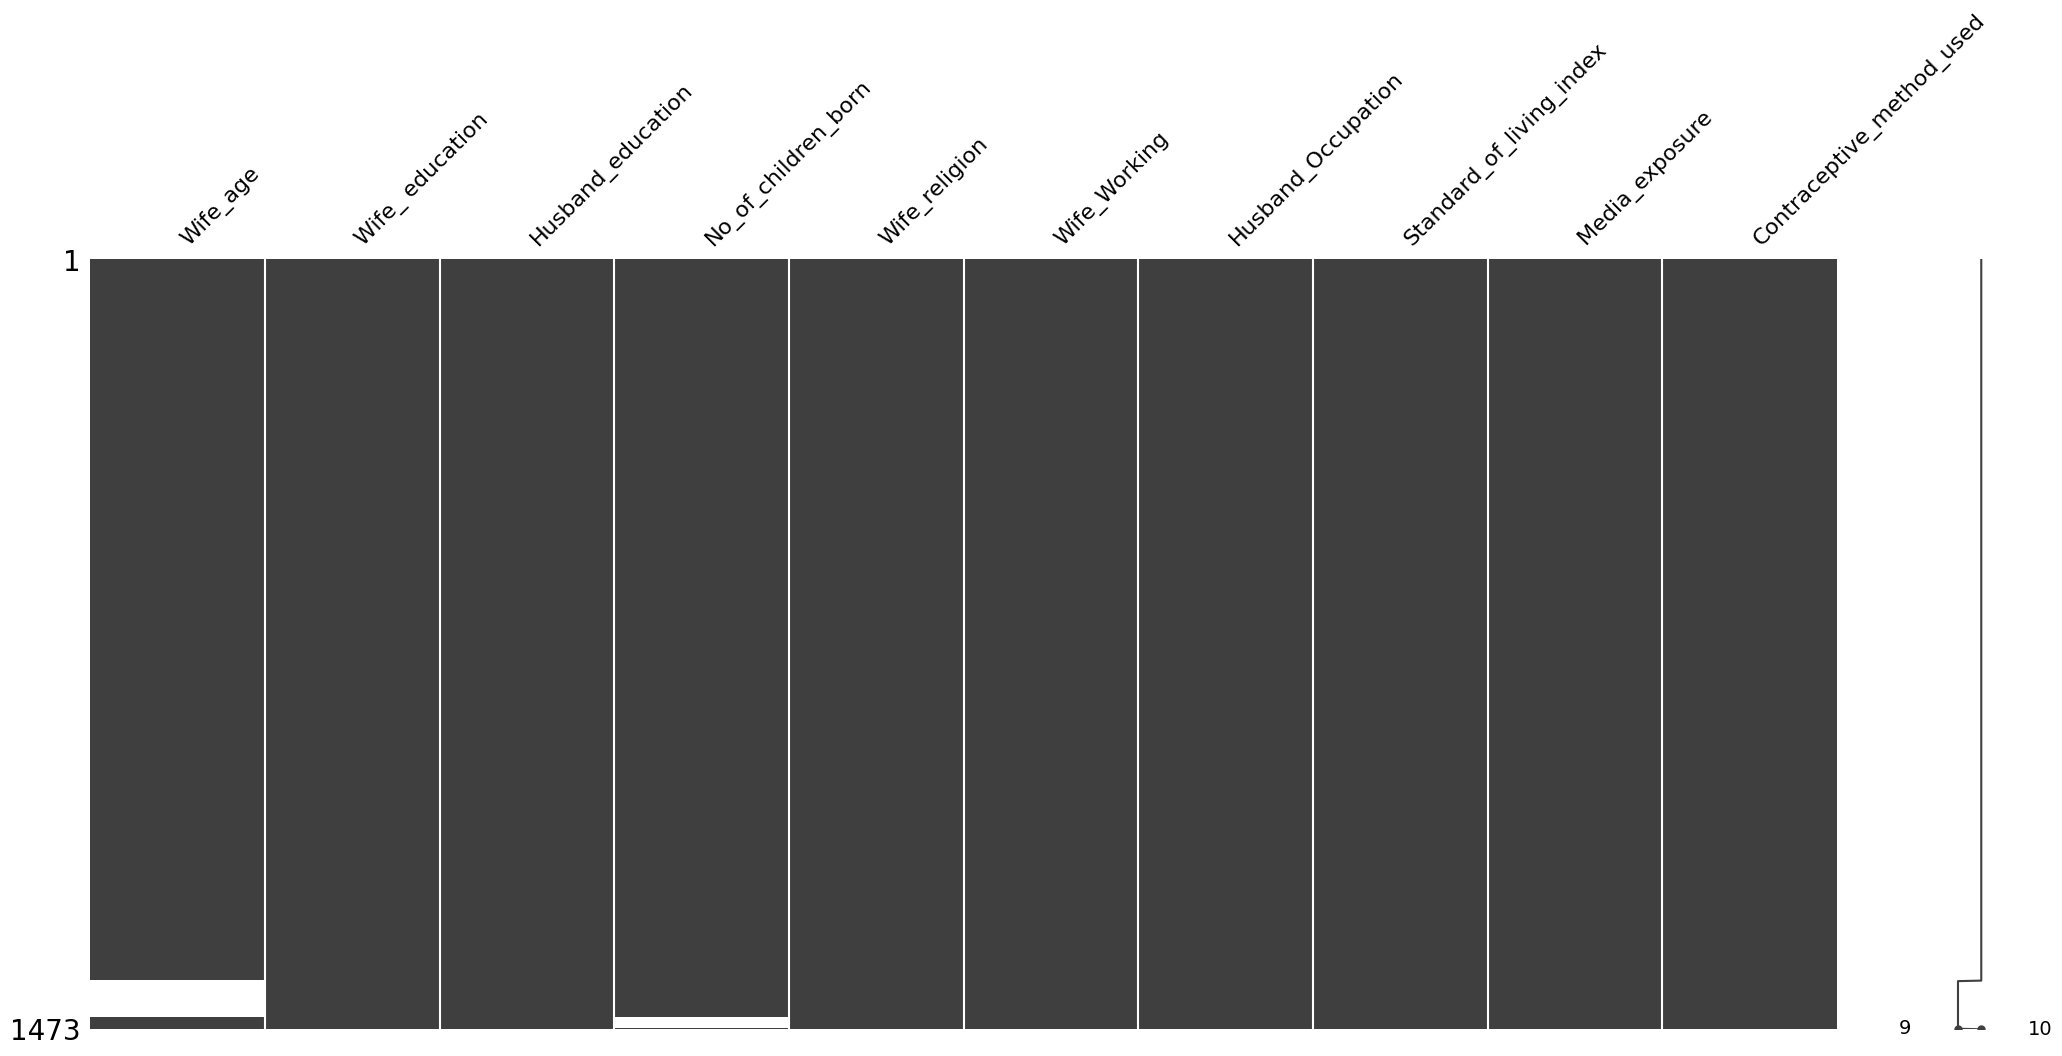

In [13]:
##
## importing missingno library to run

import missingno as msno

msno.matrix(contra1)
plt.show()

In [14]:
##
## so it seems like the null values are only concentrated at the end.
## let see how what is lacking

contra1[contra1['Wife_age'].isna()]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1380,NaN,Uneducated,Primary,4.0,Scientology,No,3,High,Exposed,Yes
1381,NaN,Uneducated,Primary,4.0,Scientology,No,3,Very Low,Not-Exposed,Yes
1382,NaN,Primary,Primary,7.0,Scientology,Yes,2,Low,Not-Exposed,Yes
1383,NaN,Secondary,Tertiary,2.0,Scientology,Yes,2,Very High,Exposed,Yes
1384,NaN,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes
...,...,...,...,...,...,...,...,...,...,...
1446,NaN,Primary,Secondary,3.0,Non-Scientology,Yes,2,Very High,Exposed,Yes
1447,NaN,Tertiary,Tertiary,2.0,Non-Scientology,Yes,2,Very High,Exposed,Yes
1448,NaN,Primary,Secondary,5.0,Scientology,No,3,High,Exposed,Yes
1449,NaN,Tertiary,Tertiary,1.0,Scientology,No,2,High,Exposed,Yes


In [15]:
##
## lets see the value counts of each feature

## Function to plot histograms for each feature in the DataFrame
def plot_histograms(df):

    features = df.columns


    for feature in features:
        plt.figure(figsize=(10, 4))
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.hist(df[feature], edgecolor='black', alpha=0.7)
        plt.show()



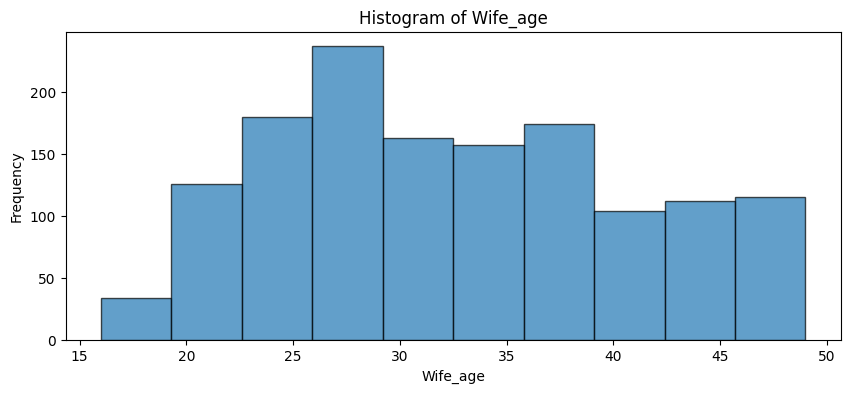

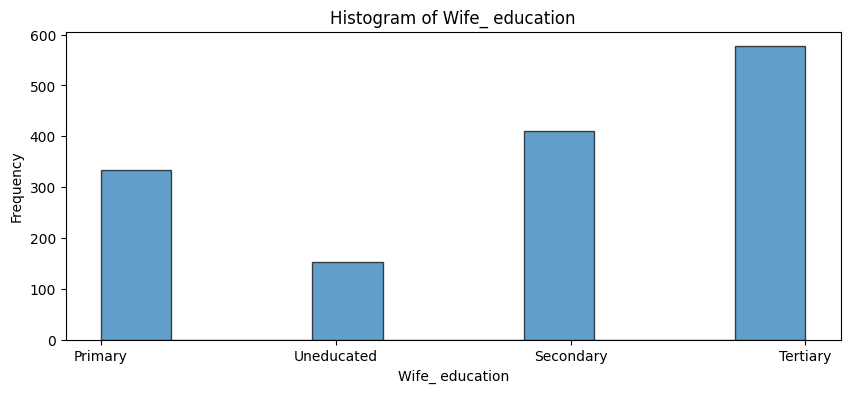

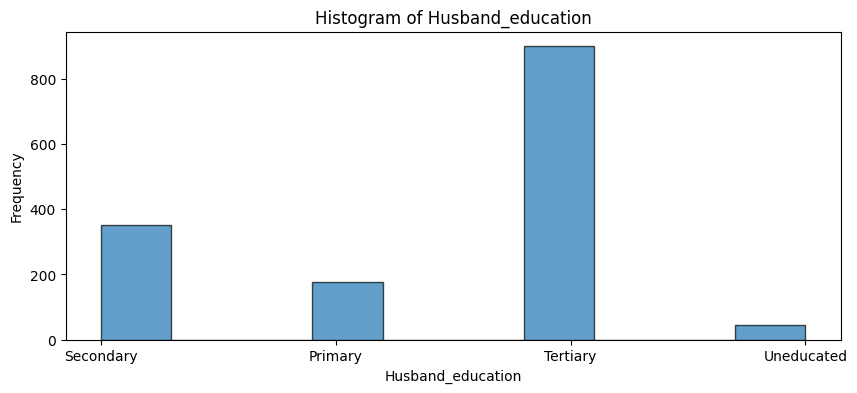

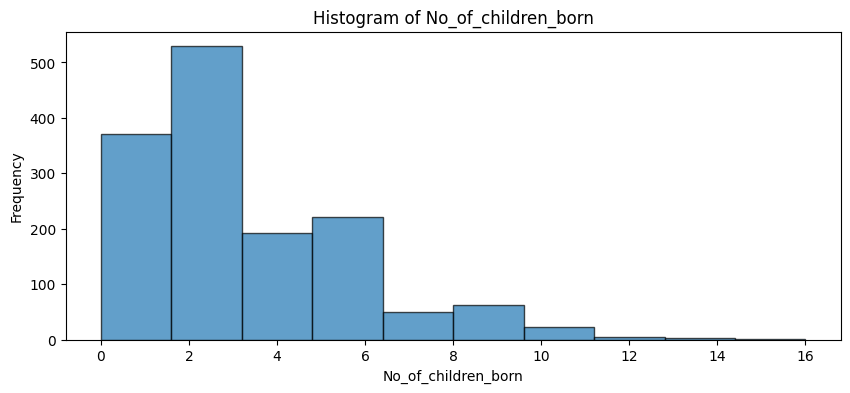

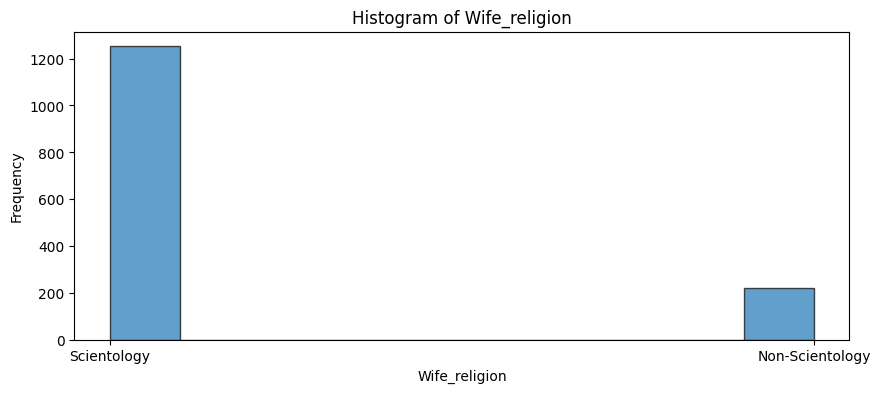

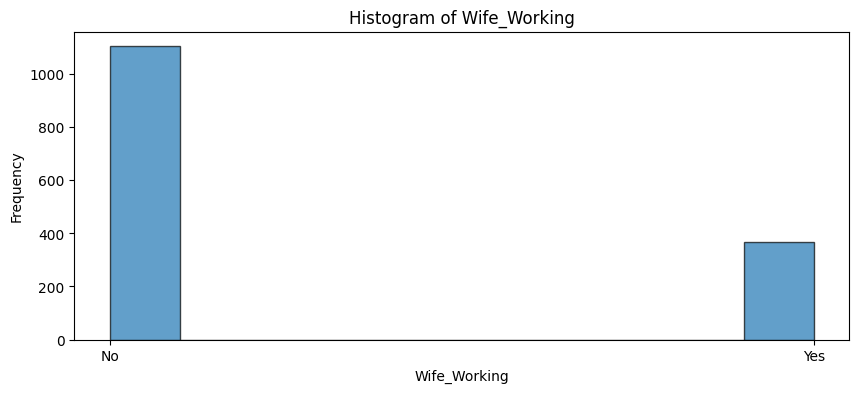

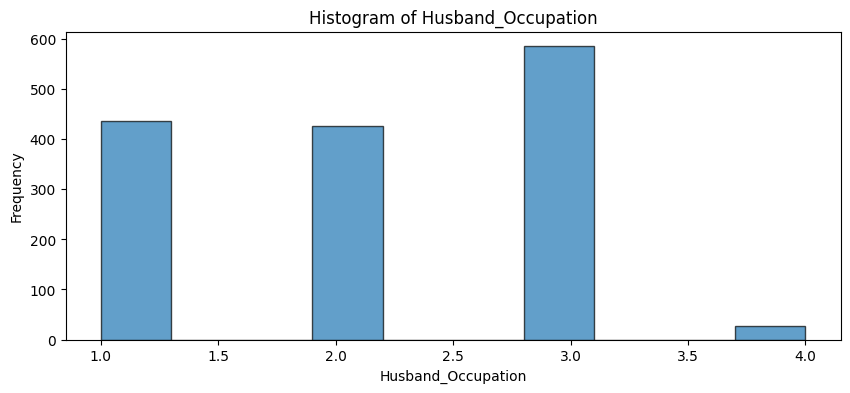

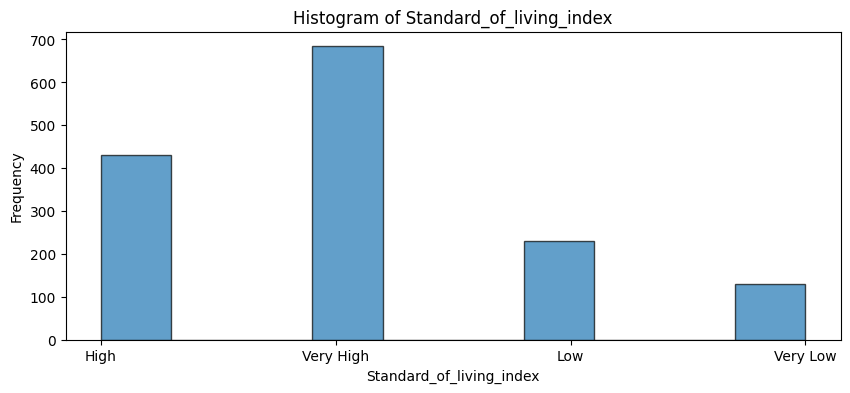

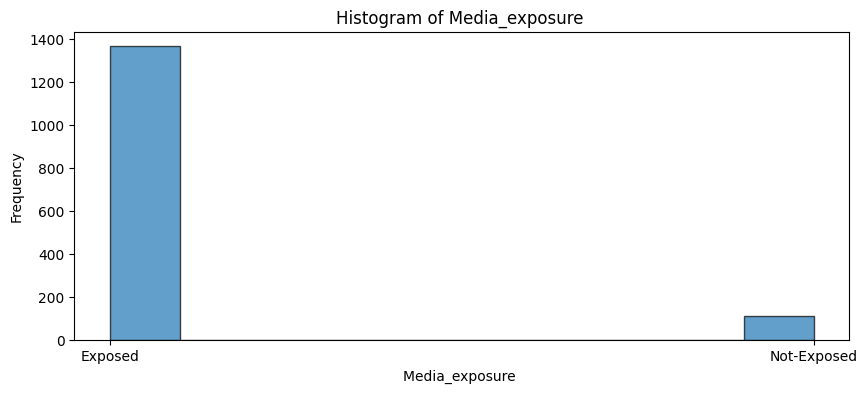

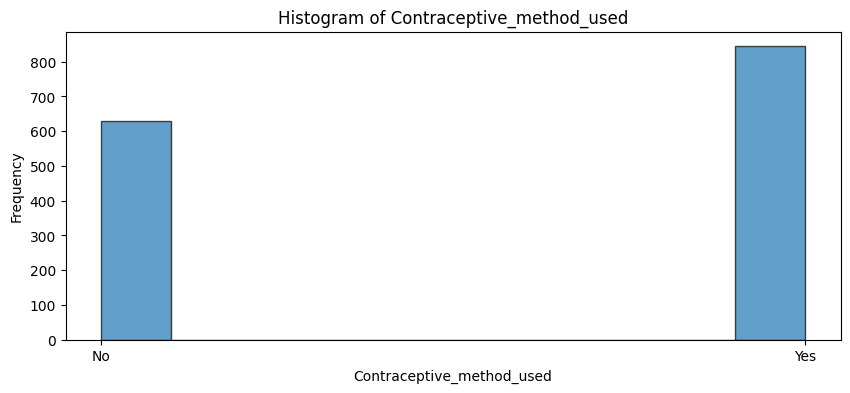

In [16]:
##
## lets call the function

plot_histograms(contra1)

In [17]:
##
## lets remove the duplcates from the data

contra2 = contra1.drop_duplicates()
contra2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1326 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1372 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


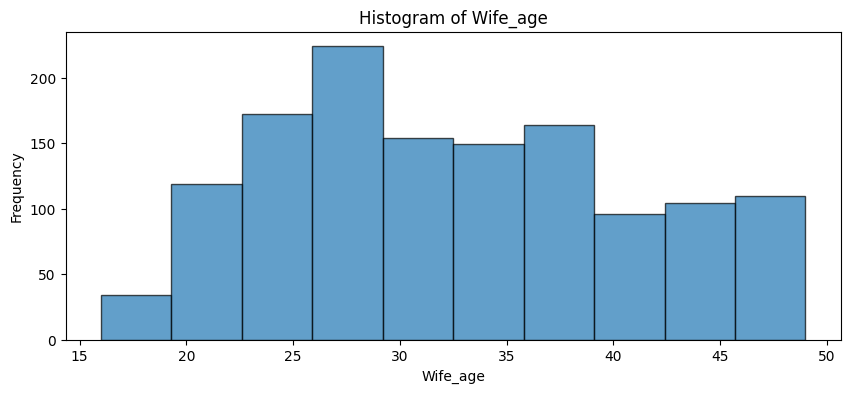

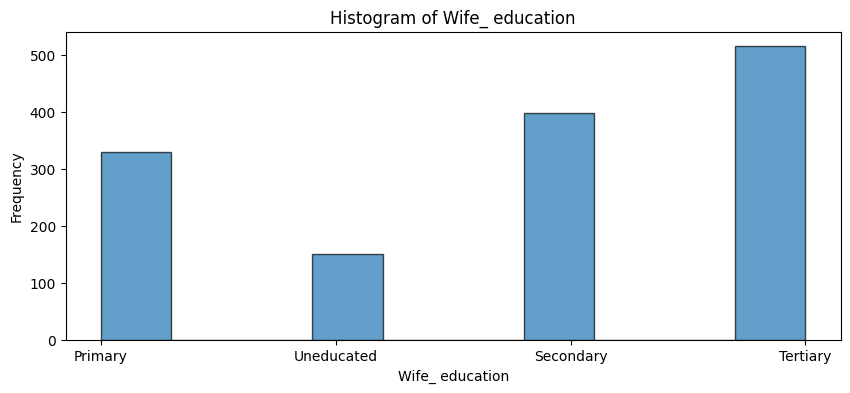

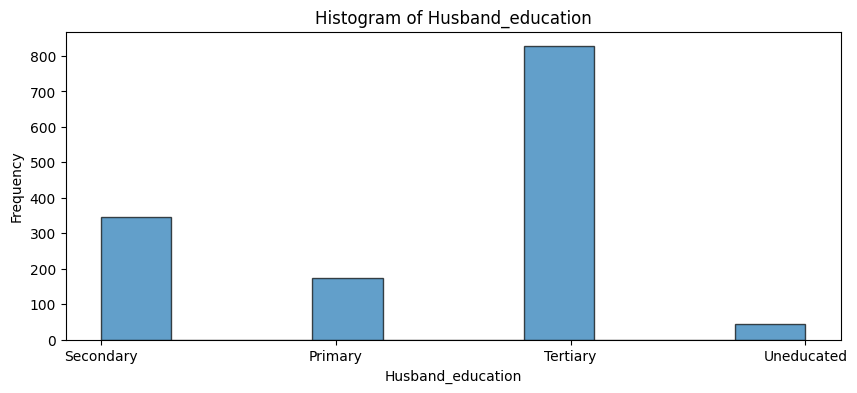

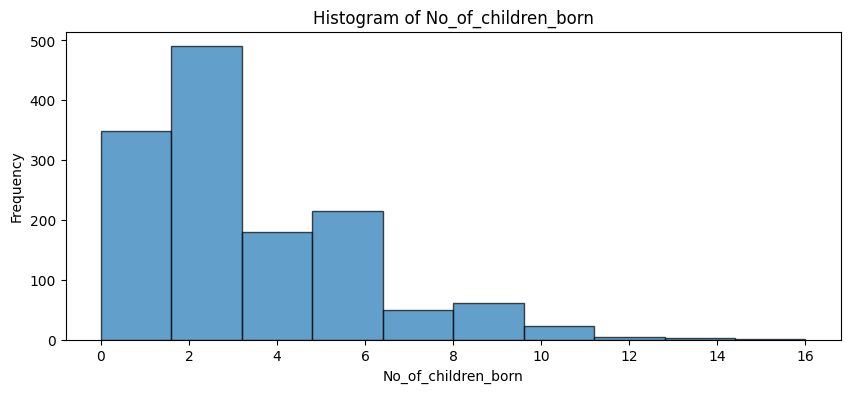

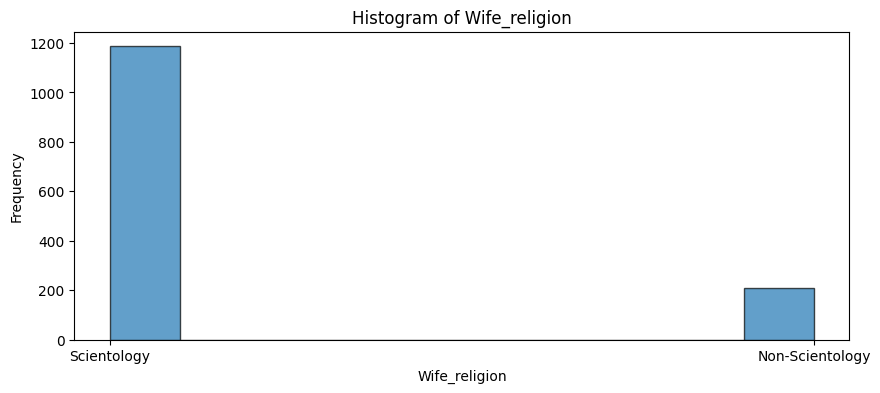

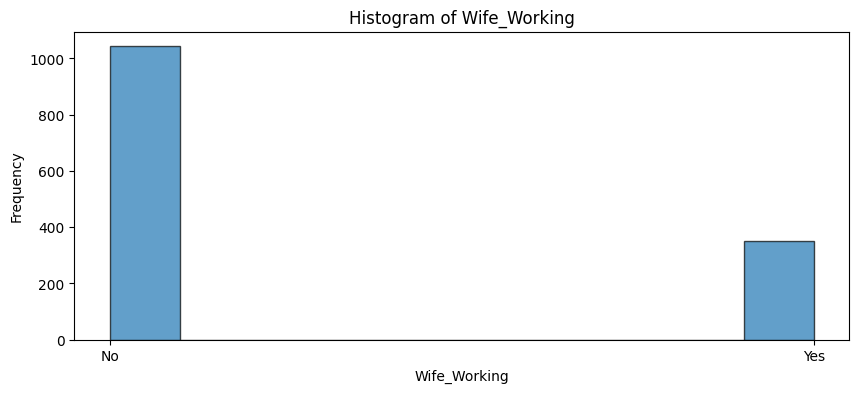

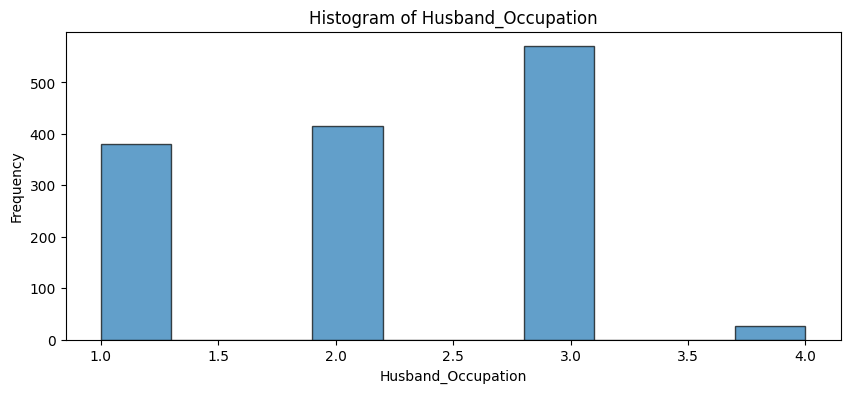

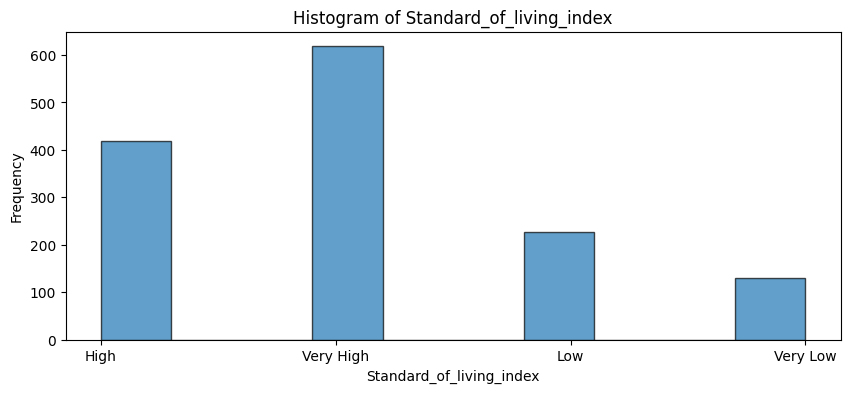

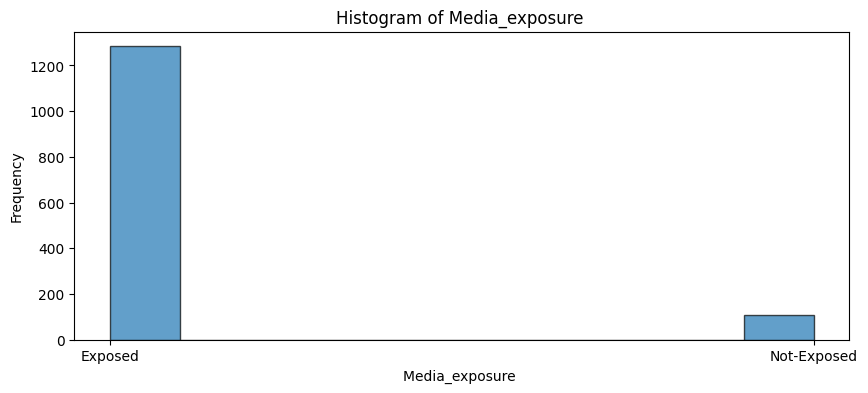

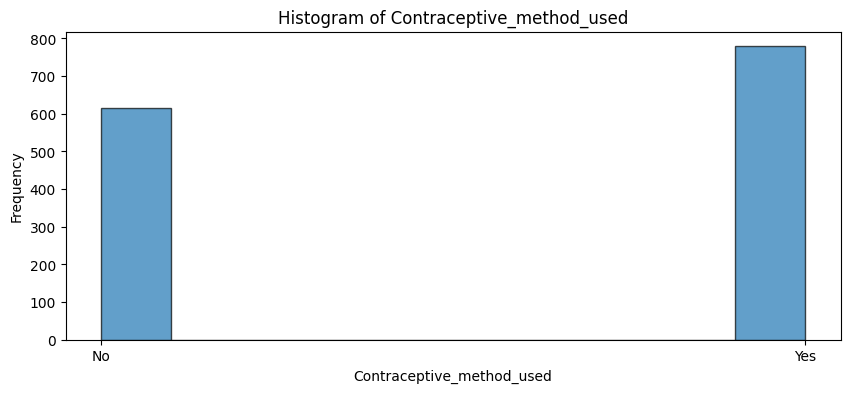

In [18]:
##
##

plot_histograms(contra2)


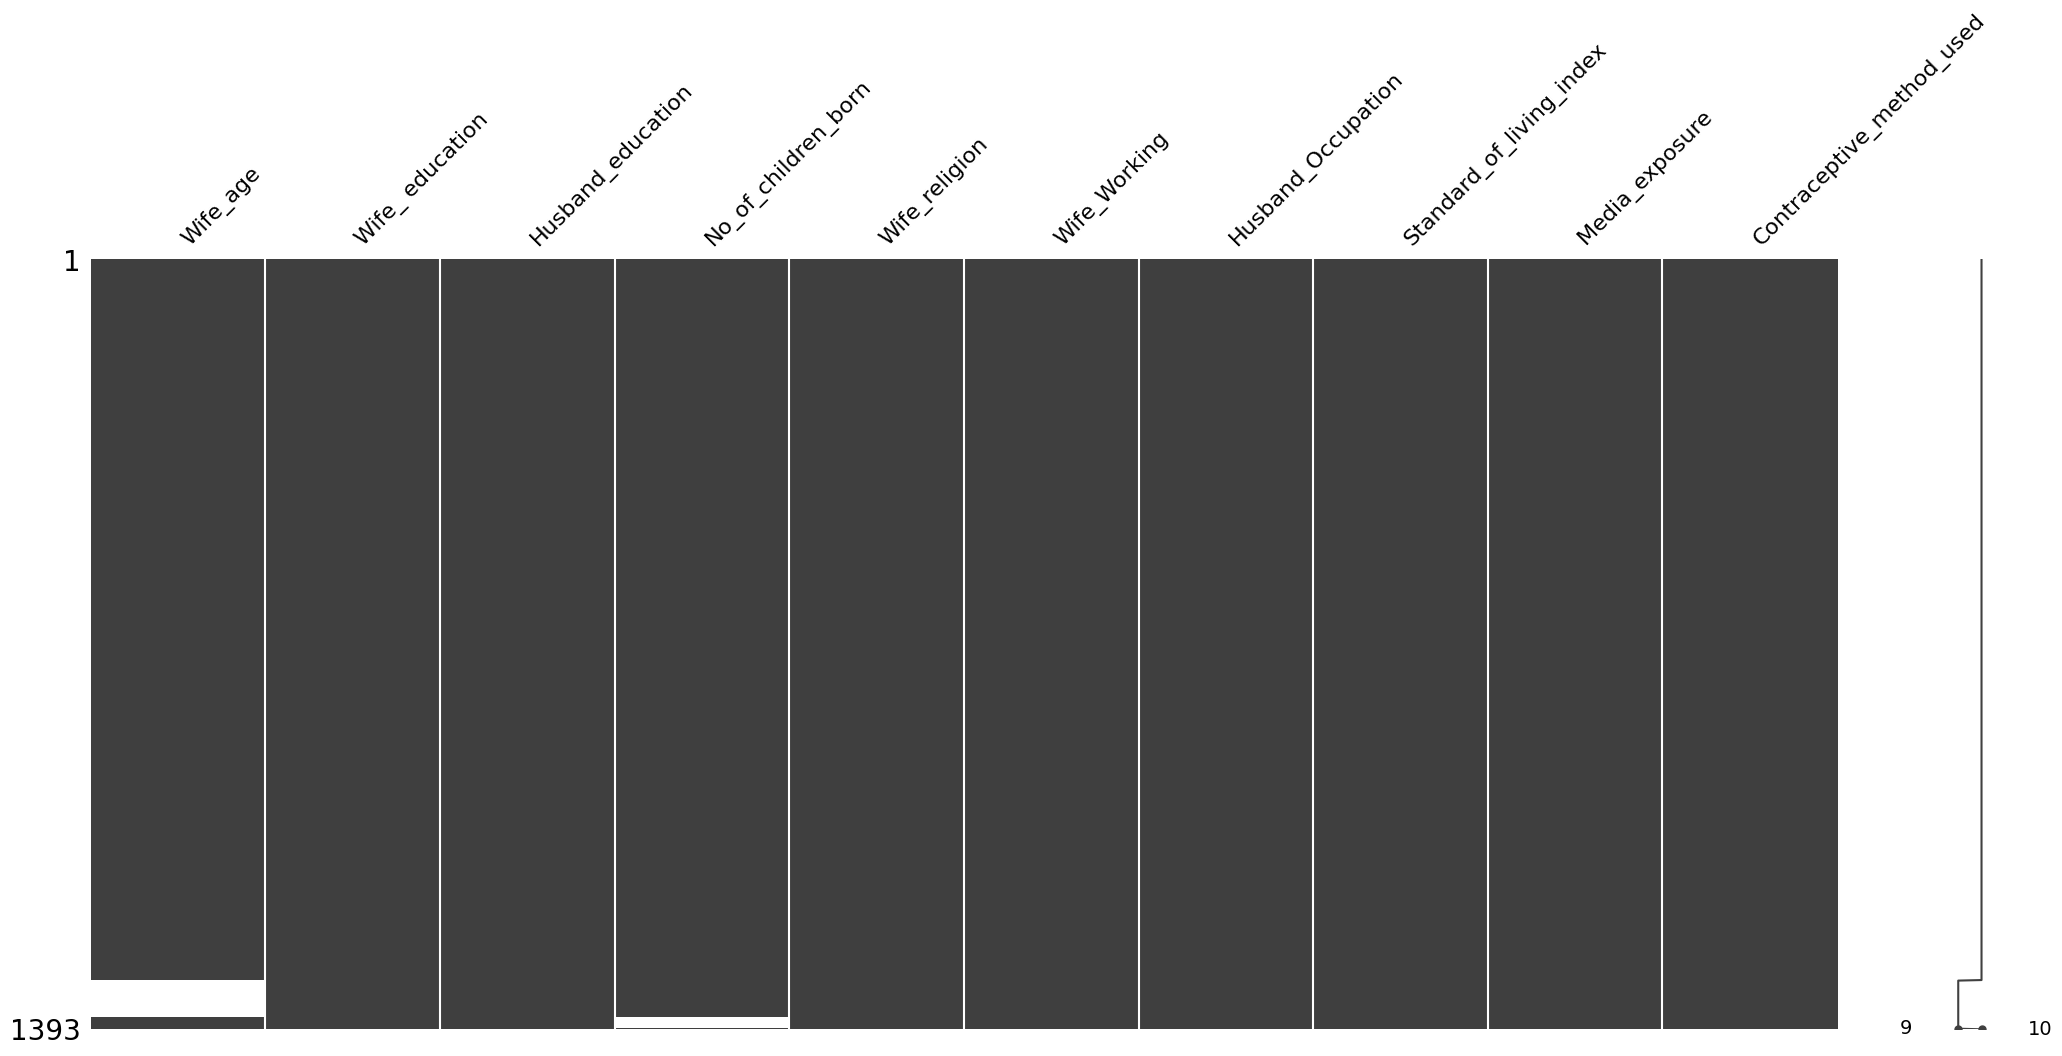

In [19]:
##
## we still have null values in 'Wife_age' column and 'No_of_children_born'

msno.matrix(contra2)
plt.show()

In [20]:
##
## dealing of null values is again dependent on what we aim to achieve and the algorithm
## if the algorithm struggles or wholley cannot then it is wiser to process the null before engaging

contra2.isna().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [21]:
##
## lets see what we can do about the nulls

contra2.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1326.000000,1372.000000,1393.000000
mean,32.557315,3.290816,2.174444
std,8.289259,2.399697,0.854590
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,39.000000,5.000000,3.000000
max,49.000000,16.000000,4.000000


In [22]:
##
## lets fill na values with median

contra2.fillna(contra2['Wife_age'].median(), inplace = True)


<ipython-input-22-94003619fcb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra2.fillna(contra2['Wife_age'].median(), inplace = True)


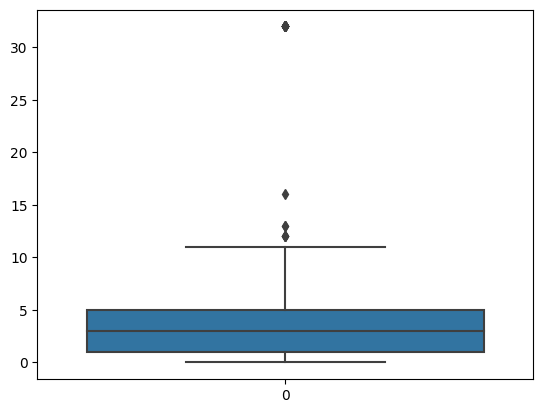

In [23]:
##
## box plot of no_of_children_born to determing the outliers


sns.boxplot(data = contra2['No_of_children_born'])
plt.show()


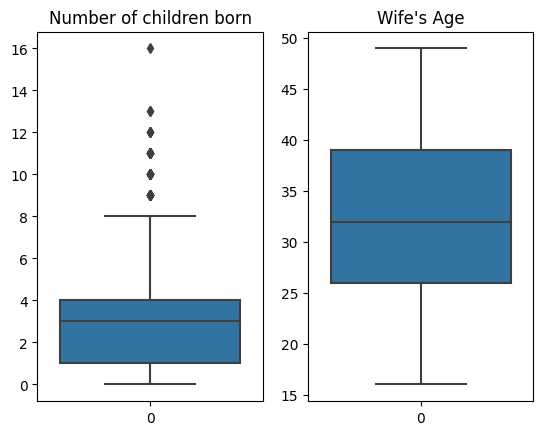

In [24]:
##
##

plt.subplot(1, 2, 1)
sns.boxplot(data = contra1['No_of_children_born'])
plt.title("Number of children born")
plt.subplot(1, 2, 2)
sns.boxplot(data = contra1['Wife_age'])
plt.title("Wife's Age")
plt.show()


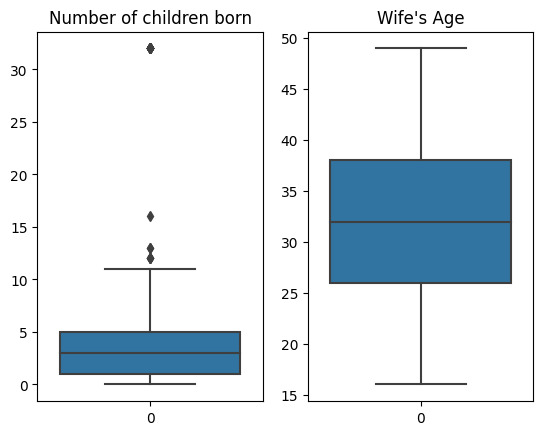

In [25]:
##
##

plt.subplot(1, 2, 1)
sns.boxplot(data = contra2['No_of_children_born'])
plt.title("Number of children born")
plt.subplot(1, 2, 2)
sns.boxplot(data = contra2['Wife_age'])
plt.title("Wife's Age")
plt.show()



In [26]:
##
##

contra2[contra2['No_of_children_born'] > 10]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
182,42.0,Uneducated,Secondary,12.0,Scientology,No,3,High,Exposed,No
192,44.0,Uneducated,Uneducated,11.0,Scientology,No,4,Very Low,Not-Exposed,No
200,42.0,Uneducated,Tertiary,11.0,Non-Scientology,No,2,Low,Not-Exposed,No
249,46.0,Secondary,Primary,11.0,Scientology,Yes,2,Low,Not-Exposed,No
485,47.0,Secondary,Tertiary,11.0,Scientology,Yes,2,High,Exposed,Yes
519,43.0,Primary,Tertiary,13.0,Scientology,No,2,High,Exposed,Yes
561,49.0,Secondary,Secondary,11.0,Scientology,No,1,Very High,Exposed,Yes
653,48.0,Tertiary,Tertiary,16.0,Scientology,No,1,Very High,Exposed,Yes
675,49.0,Tertiary,Secondary,13.0,Scientology,No,1,Very High,Exposed,Yes
747,44.0,Tertiary,Tertiary,11.0,Scientology,No,1,Very High,Exposed,Yes


In [27]:
##
## lets fill null values with median

contra2.fillna(contra2['No_of_children_born'].median(), inplace = True)

<ipython-input-27-bf4f1a3561fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra2.fillna(contra2['No_of_children_born'].median(), inplace = True)


In [28]:
##
##

contra2.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1393.000000,1393.000000,1393.000000
mean,32.530510,3.723618,2.174444
std,8.088188,4.233028,0.854590
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,38.000000,5.000000,3.000000
max,49.000000,32.000000,4.000000


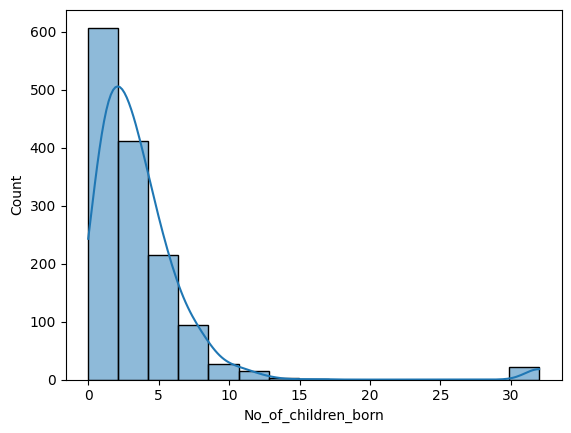

In [29]:
##
##

sns.histplot(data = contra2['No_of_children_born'], kde = True, bins = 15)
plt.show()

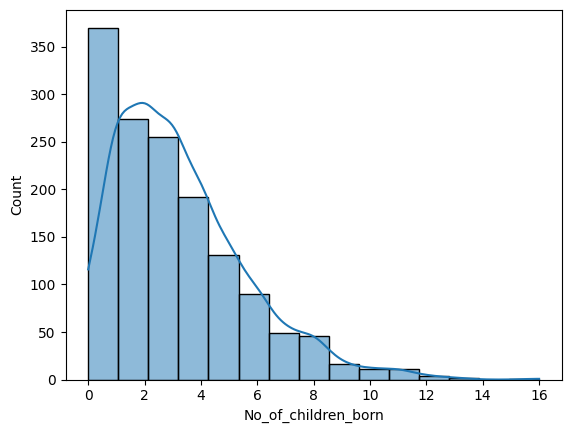

In [30]:
##
##

sns.histplot(data = contra1['No_of_children_born'], kde = True, bins = 15)
plt.show()

In [31]:
##
## lets replace the 32 values alone with median, this is current median after changing the null values

contra2['No_of_children_born'] = contra2['No_of_children_born'].replace(32.0, contra2['No_of_children_born'].median())

<ipython-input-31-133956a2d550>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra2['No_of_children_born'] = contra2['No_of_children_born'].replace(32.0, contra2['No_of_children_born'].median())


In [32]:
##
##
contra2.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1393.000000,1393.000000,1393.000000
mean,32.530510,3.286432,2.174444
std,8.088188,2.381791,0.854590
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,38.000000,5.000000,3.000000
max,49.000000,16.000000,4.000000


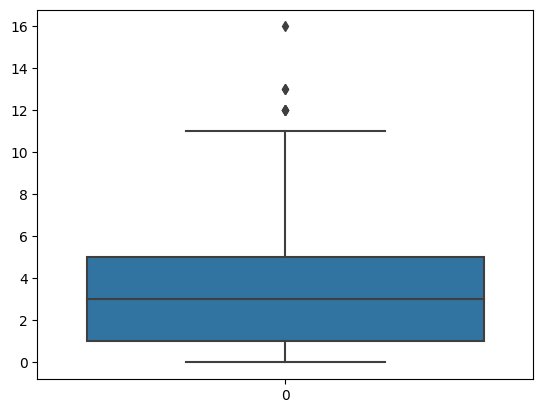

In [33]:
##
## We do have outliers but they are in the realm of possibility

sns.boxplot(data = contra2['No_of_children_born'])
plt.show()

In [34]:
##
## lets do some visualizations

contra2.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


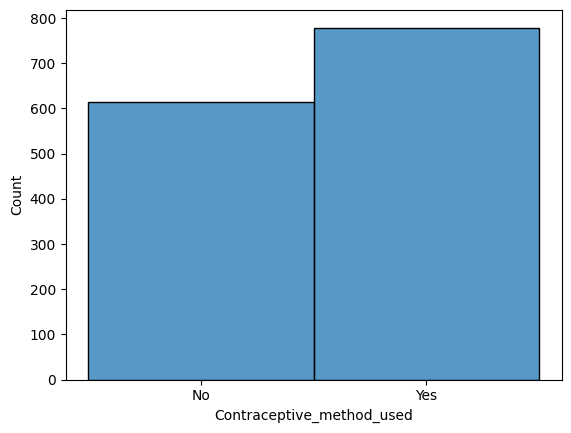

In [35]:
##
##

sns.histplot(data = contra2['Contraceptive_method_used'])
plt.show()

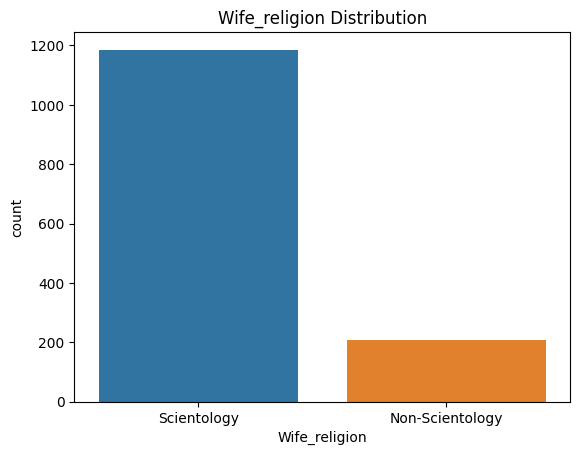

In [36]:
##
##

sns.countplot(data=contra2, x='Wife_religion')
plt.title('Wife_religion Distribution')
plt.grid
plt.show()

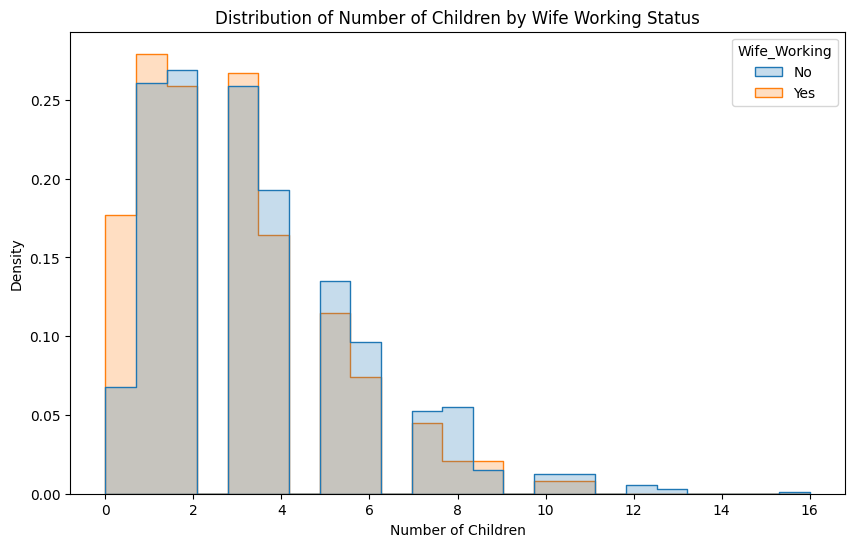

In [37]:
##
##

plt.figure(figsize=(10, 6))
sns.histplot(contra2, x='No_of_children_born', hue='Wife_Working', element="step", stat="density", common_norm=False)
plt.title('Distribution of Number of Children by Wife Working Status')
plt.xlabel('Number of Children')
plt.ylabel('Density')
plt.show()

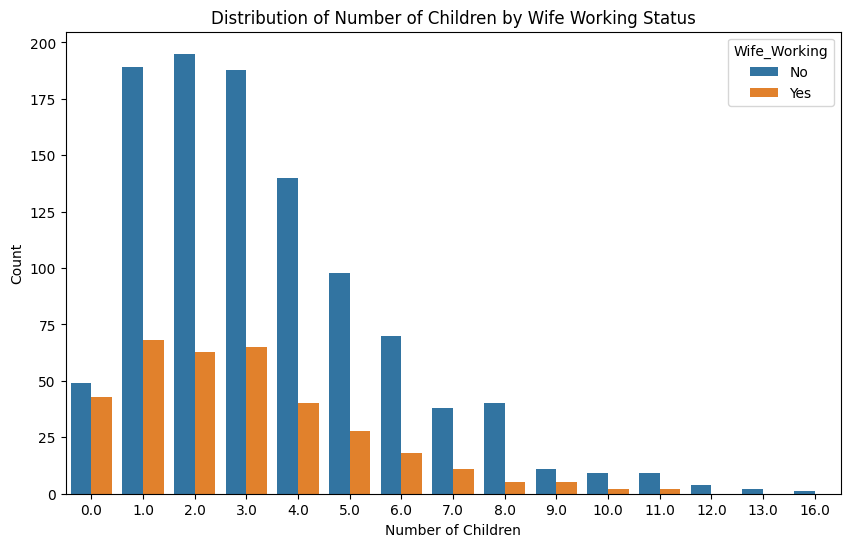

In [38]:
##
##

plt.figure(figsize=(10, 6))
sns.barplot(x=contra2['No_of_children_born'], y=contra2['No_of_children_born'], hue=contra2['Wife_Working'], estimator = len)
plt.title('Distribution of Number of Children by Wife Working Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()



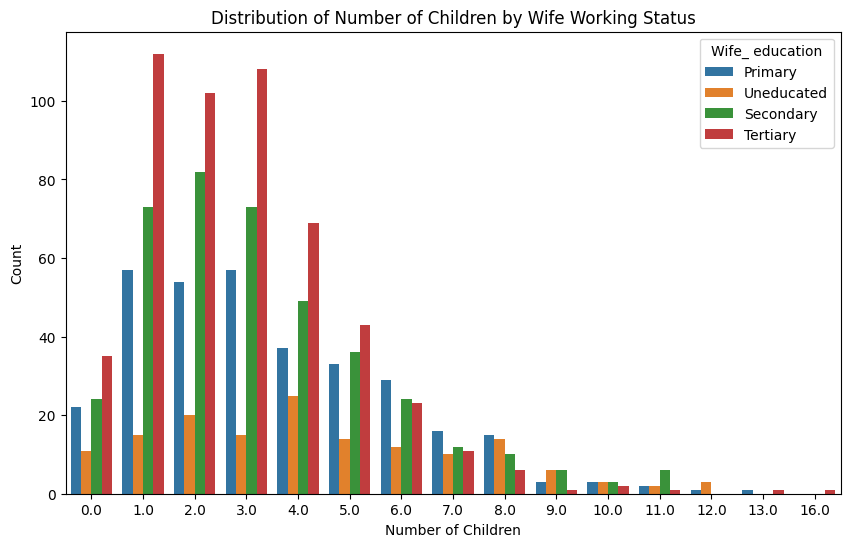

In [39]:
##
##

plt.figure(figsize=(10, 6))
sns.barplot(x=contra2['No_of_children_born'], y=contra2['No_of_children_born'], hue=contra2['Wife_ education'], estimator = len)
plt.title('Distribution of Number of Children by Wife Working Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


<Figure size 1400x800 with 0 Axes>

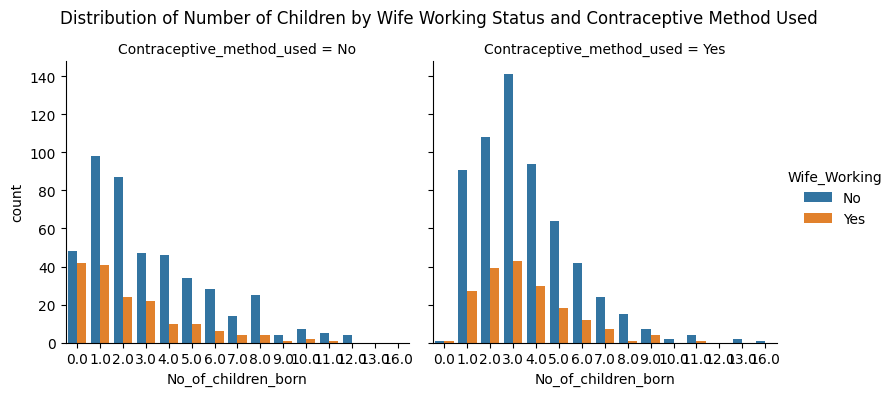

In [40]:
##
##
## Using a bar plot to show the distribution of Number_of_Children by Wife_Working status and Contraceptive_method_used

plt.figure(figsize=(14, 8))
sns.catplot(x='No_of_children_born', hue='Wife_Working', col='Contraceptive_method_used',
            data=contra2, kind='count', height=4, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Distribution of Number of Children by Wife Working Status and Contraceptive Method Used')
plt.show()

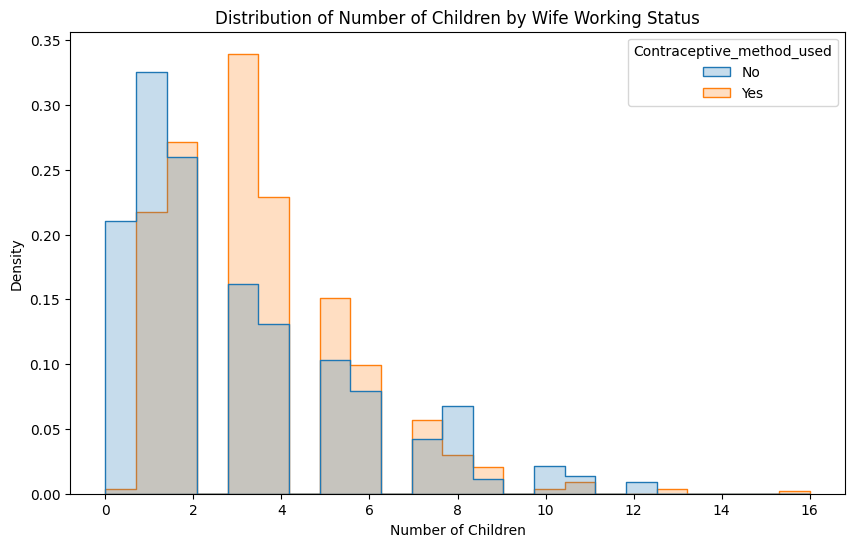

In [41]:
##
##

plt.figure(figsize=(10, 6))
sns.histplot(contra2, x='No_of_children_born', hue='Contraceptive_method_used', element="step", stat="density", common_norm=False)
plt.title('Distribution of Number of Children by Wife Working Status')
plt.xlabel('Number of Children')
plt.ylabel('Density')
plt.show()

<ipython-input-42-e57aa3f0c6d5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = contra2.corr())


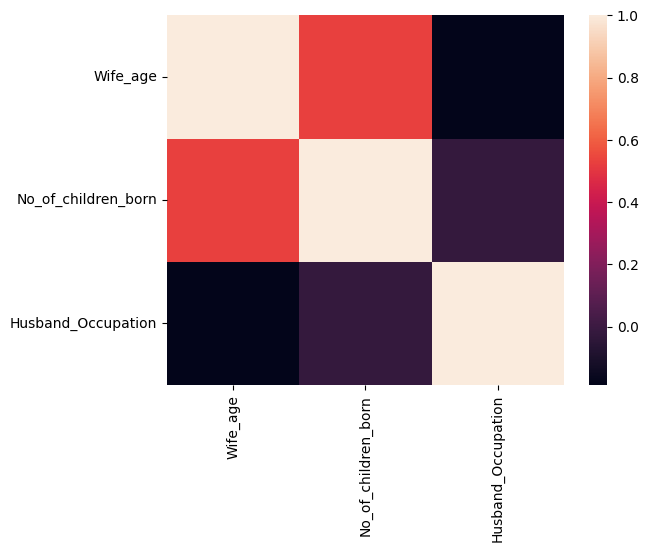

In [42]:
##
##

sns.heatmap(data = contra2.corr())
plt.show()


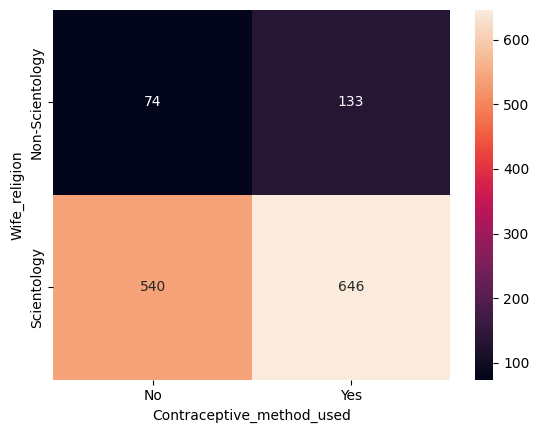

In [43]:
##
##

sns.heatmap(pd.crosstab(contra2['Wife_religion'], contra2['Contraceptive_method_used']), annot=True, fmt = "d")
plt.show()

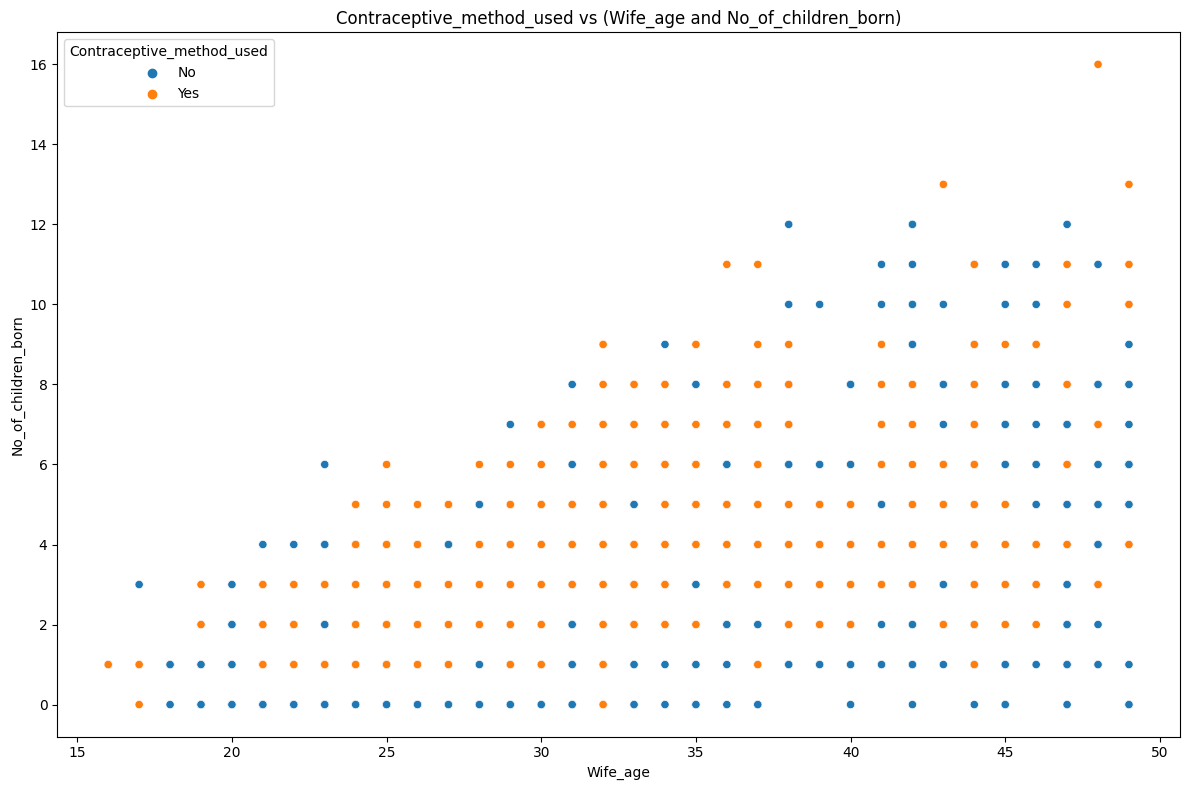

In [44]:
##
## Performing Multivariate Analysis
plt.figure(figsize=(12, 8))

sns.scatterplot(data=contra2, x='Wife_age', y='No_of_children_born', hue='Contraceptive_method_used')
plt.title('Contraceptive_method_used vs (Wife_age and No_of_children_born)')

plt.tight_layout()
plt.show()


In [45]:
##
## After doing all the treatment, there is a possibility of data being duplicated, this is *_*
## an side effect of artificially engineering values to overcome data loss.


contra2[contra2.duplicated()]


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1384,32.0,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes
1389,32.0,Tertiary,Tertiary,4.0,Scientology,Yes,1,Very High,Exposed,Yes
1431,32.0,Tertiary,Tertiary,2.0,Non-Scientology,Yes,2,Very High,Exposed,Yes
1467,29.0,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes


In [46]:
##
## Lets remove the above duplicated rows

contra2 = contra2.drop_duplicates()



### part 2


In [47]:
##
##

contra2.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [48]:
##
##

print(contra2['Wife_ education'].value_counts())
print(contra2['Husband_education'].value_counts())

Tertiary      510
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64
Tertiary      822
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


In [49]:
##
##

contra3 = contra2.copy()
contra3.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [50]:
##
## lets numericize the features we will use LabelEncoder to solve this

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
contra3['Wife_religion'] = le.fit_transform(contra3['Wife_religion'])
contra3['Wife_Working'] = le.fit_transform(contra3['Wife_Working'])
contra3['Standard_of_living_index'] = le.fit_transform(contra3['Standard_of_living_index'])
contra3['Media_exposure '] = le.fit_transform(contra3['Media_exposure '])


In [51]:
##
##

order = {'No': 0, 'Yes': 1}
contra3['Contraceptive_method_used'] = contra3['Contraceptive_method_used'].map(order)

order1 = {'Uneducated': 0, 'Primary': 3, 'Secondary': 5, 'Tertiary': 7 }
contra3['Wife_ education'] = contra3['Wife_ education'].map(order1)
contra3['Husband_education'] = contra3['Husband_education'].map(order1)



In [52]:
##
##

contra3.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,3,5,3.0,1,0,2,0,0,0
1,45.0,0,5,10.0,1,0,3,2,0,0
2,43.0,3,5,7.0,1,0,3,2,0,0
3,42.0,5,3,9.0,1,0,3,0,0,0
4,36.0,5,5,8.0,1,0,3,1,0,0


In [53]:
##
## Lets us just add wife and husband education to make them as a single column

contra3['Wife_Husband_education'] = contra3['Wife_ education'] + contra3['Husband_education']

contra3.drop(['Wife_ education', 'Husband_education'], axis = 1, inplace = True)

In [54]:
##
##

contra3['Wife_Husband_education'].value_counts()

14    477
10    255
12    248
8     153
6      87
3      71
5      48
0      26
7      23
Name: Wife_Husband_education, dtype: int64

In [55]:
##
##

contra3.head()

,Wife_age,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used,Wife_Husband_education
0,24.0,3.0,1,0,2,0,0,0,8
1,45.0,10.0,1,0,3,2,0,0,5
2,43.0,7.0,1,0,3,2,0,0,8
3,42.0,9.0,1,0,3,0,0,0,8
4,36.0,8.0,1,0,3,1,0,0,10


In [56]:
##
## lets split the data by using train test split, 70/30 is the ratio and randon_state i am using is 42

## lets set the data

contra3_X = contra3.drop(['Contraceptive_method_used'], axis = 1)
contra3_y = contra3['Contraceptive_method_used'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(contra3_X, contra3_y, test_size = 0.3, random_state = 42)


Logistic regression

In [57]:
##
##

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay


model = LogisticRegression(max_iter = 10000, penalty = None)

model.fit(X_train, y_train)


## Prediction on train and test data
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)



In [58]:
##
## lets see the predicted probabilities

y_test_predict_proba = model.predict_proba(X_test)
pd.DataFrame(y_test_predict_proba).head()

,0,1
0,0.356789,0.643211
1,0.688031,0.311969
2,0.296385,0.703615
3,0.363246,0.636754
4,0.404540,0.595460


In [59]:
##
## model evaluation - Accuracy

## Train

model.score(X_train, y_train)


0.6735324407826982

AUC: 0.702


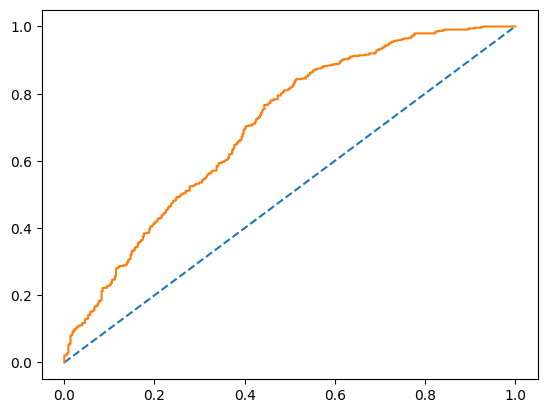

In [60]:
##
## predict probabilities
prob = model.predict_proba(X_train)
## keep probabilities for the positive outcome only
prob = prob[:, 1]
## calculate AUC
auc = roc_auc_score(y_train, prob)
print('AUC: %.3f' % auc)
## calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, prob)
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [61]:
##
##

print(confusion_matrix(y_train, y_train_predict))

tn, fp, fn, tp = confusion_matrix(y_train, y_train_predict).ravel()
print('True Negative - ' + str(tn))
print('False Positve - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positive - ' + str(tp))

[[229 206]
 [111 425]]
True Negative - 229
False Positve - 206
False Negative - 111
True Positive - 425


In [62]:
##
## classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59       435
           1       0.67      0.79      0.73       536

    accuracy                           0.67       971
   macro avg       0.67      0.66      0.66       971
weighted avg       0.67      0.67      0.67       971



In [63]:
##
##

model.n_iter_, model.tol, model.max_iter

(array([80], dtype=int32), 0.0001, 10000)

In [64]:
##
## model evaluation - Accuracy

## Test

model.score(X_test, y_test)


0.6091127098321343

AUC: 0.638


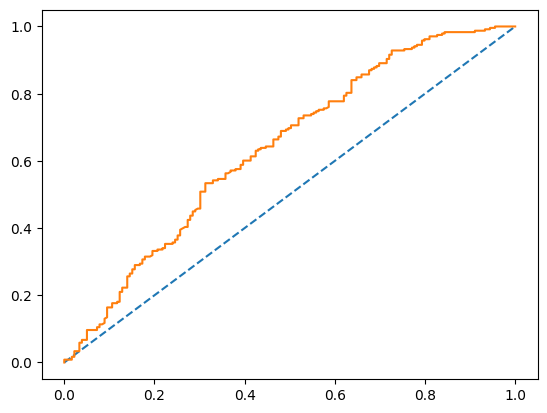

In [65]:
##
## predict probabilities
prob = model.predict_proba(X_test)
## keep probabilities for the positive outcome only
prob = prob[:, 1]
## calculate AUC
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
## calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [66]:
##
##

print(confusion_matrix(y_test, y_test_predict))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative - ' + str(tn))
print('False Positve - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positive - ' + str(tp))

[[ 69 110]
 [ 53 185]]
True Negative - 69
False Positve - 110
False Negative - 53
True Positive - 185


In [67]:
##
## classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.57      0.39      0.46       179
           1       0.63      0.78      0.69       238

    accuracy                           0.61       417
   macro avg       0.60      0.58      0.58       417
weighted avg       0.60      0.61      0.59       417



AUC for the Training Data: 0.702
AUC for the Test Data: 0.638


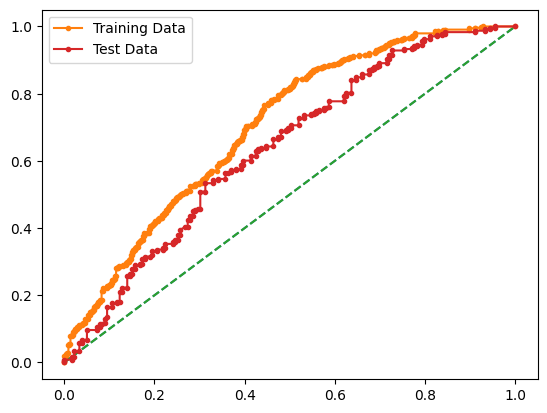

In [68]:
##
##

from sklearn import metrics,model_selection

## Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

## Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)


## AUC and ROC for the training data

## calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

## calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


## AUC and ROC for the test data

## calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

##  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
## show the plot
plt.legend(loc='best')
plt.show()

Linear Discriminant Analysis

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale


ldaclf = LinearDiscriminantAnalysis()
model = ldaclf.fit(X_train, y_train)


## Prediction on train and test data
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)


In [70]:
##
## model evaluation - Accuracy

## Train

model.score(X_train, y_train)


0.674562306900103

AUC: 0.701


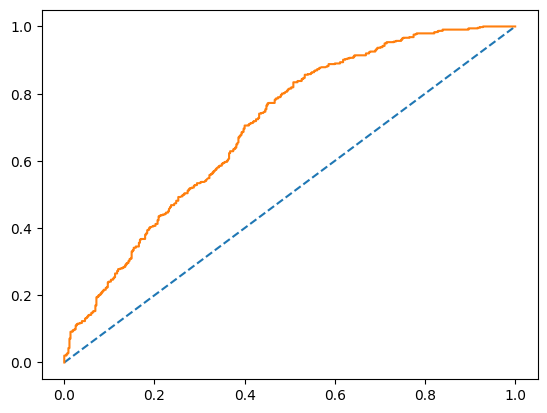

In [71]:
##
## predict probabilities
prob = model.predict_proba(X_train)
## keep probabilities for the positive outcome only
prob = prob[:, 1]
## calculate AUC
auc = roc_auc_score(y_train, prob)
print('AUC: %.3f' % auc)
## calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, prob)
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [72]:
##
##

print(confusion_matrix(y_train, y_train_predict))

tn, fp, fn, tp = confusion_matrix(y_train, y_train_predict).ravel()
print('True Negative - ' + str(tn))
print('False Positve - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positive - ' + str(tp))

[[219 216]
 [100 436]]
True Negative - 219
False Positve - 216
False Negative - 100
True Positive - 436


In [73]:
##
## classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       435
           1       0.67      0.81      0.73       536

    accuracy                           0.67       971
   macro avg       0.68      0.66      0.66       971
weighted avg       0.68      0.67      0.67       971



In [74]:
##
## model evaluation - Accuracy

## Test

model.score(X_test, y_test)


0.6187050359712231

AUC: 0.636


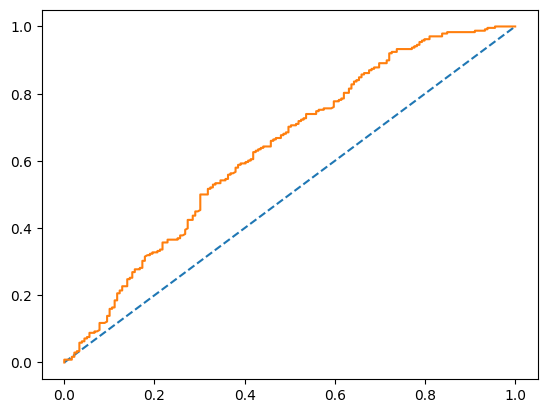

In [75]:
##
## predict probabilities
prob = model.predict_proba(X_test)
## keep probabilities for the positive outcome only
prob = prob[:, 1]
## calculate AUC
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
## calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [76]:
##
##

print(confusion_matrix(y_test, y_test_predict))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative - ' + str(tn))
print('False Positve - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positive - ' + str(tp))

[[ 67 112]
 [ 47 191]]
True Negative - 67
False Positve - 112
False Negative - 47
True Positive - 191


In [77]:
##
## classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.59      0.37      0.46       179
           1       0.63      0.80      0.71       238

    accuracy                           0.62       417
   macro avg       0.61      0.59      0.58       417
weighted avg       0.61      0.62      0.60       417



AUC for the Training Data: 0.701
AUC for the Test Data: 0.636


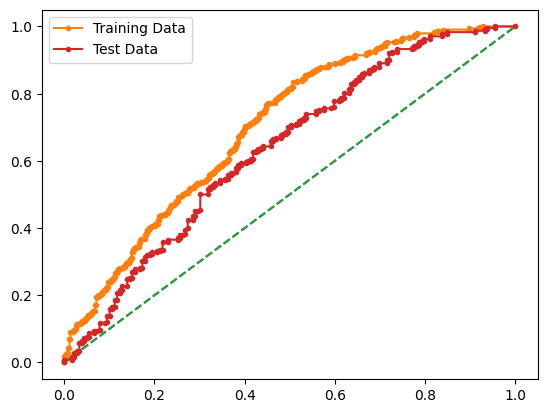

In [78]:
##
##

## Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

## Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)


## AUC and ROC for the training data

## calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

## calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


## AUC and ROC for the test data

## calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

##  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
## show the plot
plt.legend(loc='best')
plt.show()

CART - Decision Tree Classifier


In [79]:
##
##

from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

dtclf.fit(X_train, y_train)



## Prediction on train and test data
y_train_predict = dtclf.predict(X_train)
y_test_predict = dtclf.predict(X_test)


In [80]:
##
## variable importances

print(pd.DataFrame(dtclf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.328145
No_of_children_born       0.231461
Wife_Husband_education    0.154400
Standard_of_living_index  0.108209
Husband_Occupation        0.088845
Wife_Working              0.048532
Wife_religion             0.027720
Media_exposure            0.012689


In [81]:
##
## model evaluation - Accuracy

## Train

model.score(X_train, y_train)


0.674562306900103

AUC: 0.701


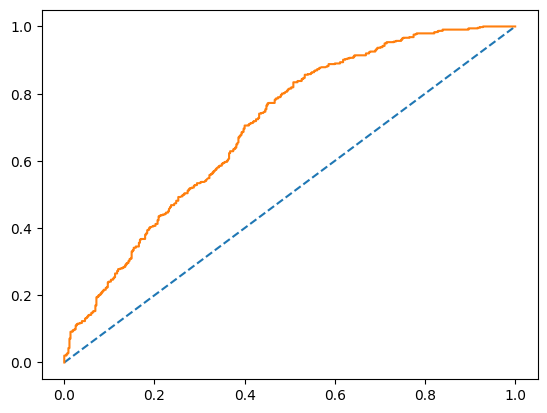

In [82]:
##
## predict probabilities
prob = model.predict_proba(X_train)
## keep probabilities for the positive outcome only
prob = prob[:, 1]
## calculate AUC
auc = roc_auc_score(y_train, prob)
print('AUC: %.3f' % auc)
## calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, prob)
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [83]:
##
##

print(confusion_matrix(y_train, y_train_predict))

tn, fp, fn, tp = confusion_matrix(y_train, y_train_predict).ravel()
print('True Negative - ' + str(tn))
print('False Positve - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positive - ' + str(tp))

[[434   1]
 [ 14 522]]
True Negative - 434
False Positve - 1
False Negative - 14
True Positive - 522


In [84]:
##
## classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       435
           1       1.00      0.97      0.99       536

    accuracy                           0.98       971
   macro avg       0.98      0.99      0.98       971
weighted avg       0.98      0.98      0.98       971



In [85]:
##
## model evaluation - Accuracy

## Test

model.score(X_test, y_test)


0.6187050359712231

AUC: 0.636


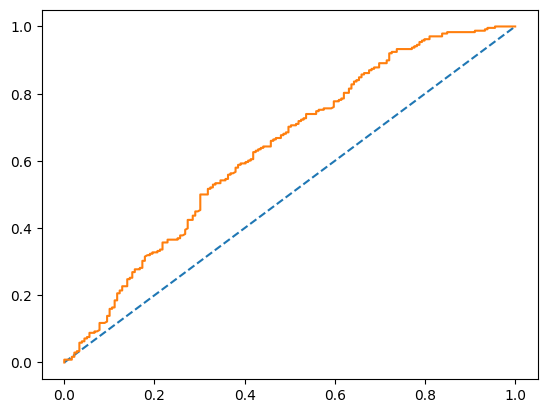

In [86]:
##
## predict probabilities
prob = model.predict_proba(X_test)
## keep probabilities for the positive outcome only
prob = prob[:, 1]
## calculate AUC
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
## calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, prob)
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [87]:
##
##

print(confusion_matrix(y_test, y_test_predict))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict).ravel()
print('True Negative - ' + str(tn))
print('False Positve - ' + str(fp))
print('False Negative - ' + str(fn))
print('True Positive - ' + str(tp))

[[ 98  81]
 [ 91 147]]
True Negative - 98
False Positve - 81
False Negative - 91
True Positive - 147


In [88]:
##
## classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.52      0.55      0.53       179
           1       0.64      0.62      0.63       238

    accuracy                           0.59       417
   macro avg       0.58      0.58      0.58       417
weighted avg       0.59      0.59      0.59       417



AUC for the Training Data: 0.701
AUC for the Test Data: 0.636


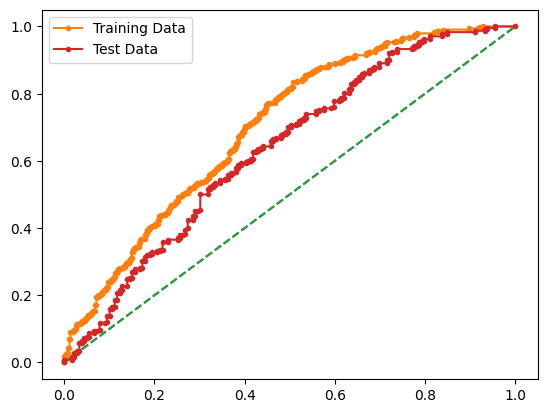

In [89]:
##
##

## Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

## Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)


## AUC and ROC for the training data

## calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

## calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


## AUC and ROC for the test data

## calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

##  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
## plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
## show the plot
plt.legend(loc='best')
plt.show()